In [ ]:
# Basic Libraries
import numpy as np
import os
from IPython.display import display
# from pandasai import Agent
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
loldata = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir_gamedata_v4.csv', sep=',')
# agent = Agent(loldata)
# agent.chat('Which 5 champions are seen the most?')

In [ ]:


lolData_Qtn1_Columns = ['t1_result','t2_result','gamelength','t1p1_champion','t1p2_champion','t1p3_champion','t1p4_champion','t1p5_champion','t2p1_champion','t2p2_champion','t2p3_champion','t2p4_champion','t2p5_champion']
loldataQtn1 = loldata[lolData_Qtn1_Columns].copy()
lolChampdata = pd.read_csv('LoL-Champions.csv')
lolChampdata_ChampName_TagName = lolChampdata[['Name', 'Class']]
# Assuming 'loldata' is the name of your DataFrame
dfsA = ['t1p1_champion','t1p2_champion','t1p3_champion','t1p4_champion','t1p5_champion']
dfsAA = ['t2p1_champion','t2p2_champion','t2p3_champion','t2p4_champion','t2p5_champion']
# Filter rows where t1_result is 1 for Team 1 and t2_result is 1 for Team 2
winning_compositions_t1 = loldataQtn1[loldataQtn1['t1_result'] == 1]
winning_compositions_t2 = loldataQtn1[loldataQtn1['t2_result'] == 1]

dfsns = winning_compositions_t1[dfsA].copy()
dfsC= winning_compositions_t2[dfsAA].copy()

# Rename the columns of specific_columns_team1 and specific_columns_team2
dfsns.columns = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']
dfsC.columns = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']

combined_dataframe = pd.concat([dfsns, dfsC], ignore_index=True)


#### Which champion team composition has the high chance of winning? (Association)

To do so, we have combined the data sets from the Game Match Dataset and Champion Info Dataset and filtered it out to only take in teams that won. 

We then further merged the classes for each champion and inputted them in the dataframe. (e.g P1 Top (Name of Champion) P1 Top Class (Class type of champion))

In [ ]:
# Assuming you have loaded Dataset1 and Dataset2 into pandas DataFrames

# Perform left join
merged_data = pd.merge(combined_dataframe, lolChampdata_ChampName_TagName, left_on='P1 Top', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P1 Top Class'}, inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P2 Jungle', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P2 Jungle Class'}, inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P3 Mid', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P3 Mid Class'}, inplace=True)

#Drop the redundant 'Name' columns
merged_data.drop(columns=['Name_x', 'Name_y'], inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P4 Bot', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P4 Bot Class'}, inplace=True)

merged_data.drop(columns=['Name_x', 'Name_y'], inplace=True)

merged_data = pd.merge(merged_data, lolChampdata_ChampName_TagName, left_on='P5 Support', right_on='Name', how='left')
merged_data.rename(columns={'Class': 'P5 Support Class'}, inplace=True)

merged_data.drop(columns=['Name'], inplace=True)

desired_columns_order = ['P1 Top', 'P1 Top Class', 'P2 Jungle', 'P2 Jungle Class', 'P3 Mid', 'P3 Mid Class', 'P4 Bot','P4 Bot Class','P5 Support','P5 Support Class']

# Reorder the columns
merged_data = merged_data[desired_columns_order]

# Display the resulting DataFrame
display(merged_data)



Here is the prepared data frame after doing the successfuly merging. 

In [ ]:
# Define the dataframe with team compositions
data = merged_data[['P1 Top Class', 'P2 Jungle Class', 'P3 Mid Class', 'P4 Bot Class', 'P5 Support Class']]
dfs = pd.DataFrame(data)
# Fill any NaN values with a placeholder string
dfs = dfs.fillna('Unknown')

# Convert all values to strings
dfs = dfs.astype(str)

# Mapping dictionary to replace class names with letters
class_mapping = {
    'Assassin': 'A',
    'Assassin-Warrior': 'AW',
    'Mage': 'M',
    'Mage-Assassin': 'MA',
    'Mage-Marksman': 'MM',
    'Mage-Support': 'MS',
    'Mage-Warrior': 'MW',
    'Marksman': 'MK',
    'Marksman-Support': 'MKS',
    'Marksman-Warrior': 'MKW',
    'Support': 'S',
    'Tank': 'T',
    'Tank-Support': 'TS',
    'Tank-Warrior': 'TW',
    'Warrior': 'W',
    'Warrior-Assassin': 'WA',

}


# Dictionary to map class abbreviations back to full names
class_mapping_reverse = {v: k for k, v in class_mapping.items()}


# Rename class columns with letters
for col in dfs.columns:
    dfs[col] = dfs[col].map(class_mapping)

# Concatenate the class columns to create a new column representing the class set
dfs['Class_Set'] = dfs.apply(lambda row: '-'.join(row), axis=1)

# Count the occurrences of each class set
top_class_sets = dfs['Class_Set'].value_counts().head(10)

# Plotting
plt.figure(figsize=(16, 26))  # Increase the height to accommodate the label below
top_class_sets.plot(kind='bar')
plt.title('Frequency of Champion Class Sets')
plt.xlabel('Champion Class Set')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=12)  # Adjust the rotation and fontsize as needed

# Display class_mapping_reverse at the bottom left of the plot
table_text = '\n'.join([f'{abbr}: {full}' for abbr, full in class_mapping_reverse.items()])
plt.text(0, -0.2, table_text, ha='left', fontsize=10, transform=plt.gca().transAxes)

# Find the class set with the highest frequency
best_class_set = top_class_sets.idxmax()
best_frequency = top_class_sets.max()

# Add text on the top right
bot_right_text = f'Best class set: {best_class_set}\nFrequency: {best_frequency}'
plt.text(1, -0.1, bot_right_text, ha='right', va='top', fontsize=12, transform=plt.gca().transAxes)

top_right_text = f'x - Refers to the positions '
plt.text(0.99, 0.95, top_right_text, ha='right', va='top', fontsize=12, transform=plt.gca().transAxes)


plt.tight_layout()
plt.show()





#### The best champion class set is: W-W-M-MK-S
#### Frequency of occurrence: 59

In [ ]:

# data = merged_data[['P1 Top Class', 'P2 Jungle Class', 'P3 Mid Class', 'P4 Bot Class', 'P5 Support Class']]

df = pd.DataFrame(data)

# Calculate class frequencies for each position
class_frequencies = df.apply(pd.Series.value_counts)

# Transpose the DataFrame for better visualization
class_frequencies = class_frequencies.T

# Reset index to make position a column instead of index
class_frequencies.reset_index(inplace=True)

# Melt the DataFrame to convert it to long format for plotting
class_frequencies_melted = pd.melt(class_frequencies, id_vars=['index'], var_name='Class', value_name='Frequency')

# Filter data for each position
df_p1 = class_frequencies_melted[class_frequencies_melted['index'] == 'P1 Top Class']
df_p2 = class_frequencies_melted[class_frequencies_melted['index'] == 'P2 Jungle Class']
df_p3 = class_frequencies_melted[class_frequencies_melted['index'] == 'P3 Mid Class']
df_p4 = class_frequencies_melted[class_frequencies_melted['index'] == 'P4 Bot Class']
df_p5 = class_frequencies_melted[class_frequencies_melted['index'] == 'P5 Support Class']

# Create subplots
fig, axes = plt.subplots(5, 1, figsize=(16, 24), sharex=True)

# Plot for P1 Top Class
sns.scatterplot(data=df_p1, x='Class', y='Frequency', hue='Class', s=200, ax=axes[0])
axes[0].set_title('Distribution of Class Frequencies For P1 Top Position')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Plot for P2 Jungle Class
sns.scatterplot(data=df_p2, x='Class', y='Frequency', hue='Class', s=200, ax=axes[1])
axes[1].set_title('Distribution of Class Frequencies For P2 Jungle Position')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Plot for P3 Mid Class
sns.scatterplot(data=df_p3, x='Class', y='Frequency', hue='Class', s=200, ax=axes[2])
axes[2].set_title('Distribution of Class Frequencies For P3 Mid Position')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Frequency')
axes[2].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].tick_params(axis='x', rotation=45)

# Plot for P4 Bot Class
sns.scatterplot(data=df_p4, x='Class', y='Frequency', hue='Class', s=200, ax=axes[3])
axes[3].set_title('Distribution of Class Frequencies For P4 Bot Position')
axes[3].set_xlabel('Class')
axes[3].set_ylabel('Frequency')
axes[3].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3].tick_params(axis='x', rotation=45)

# Plot for P5 Support Class
sns.scatterplot(data=df_p5, x='Class', y='Frequency', hue='Class', s=200, ax=axes[4])
axes[4].set_title('Distribution of Class Frequencies For P5 Support Position')
axes[4].set_xlabel('Class')
axes[4].set_ylabel('Frequency')
axes[4].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
# Pivot the DataFrame
heatmap_data = class_frequencies_melted.pivot_table(index='index', columns='Class', values='Frequency', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='.0f')  # Use '.0f' for floats
plt.title('Class Frequency Across Positions')
plt.xlabel('Class')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Iterate over each position
positions = class_frequencies_melted['index'].unique()
for position in positions:
    # Filter data for the current position
    df_position = class_frequencies_melted[class_frequencies_melted['index'] == position]
    
    # Calculate total frequencies for each class for the current position
    total_class_frequencies = df_position.groupby('Class')['Frequency'].sum()
    
    # Sort the class frequencies in descending order and select the top 5 classes
    top_5_classes = total_class_frequencies.sort_values(ascending=False).head(5)
    
    # Plot the pie chart for the top 5 classes in the current position
    plt.figure(figsize=(16, 8))
    plt.pie(top_5_classes, labels=top_5_classes.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Class Frequencies for {position}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


In [ ]:
# Assuming 'combined_dataframe' is the name of your DataFrame
# Assuming you have already combined your dataframes and stored them in 'combined_dataframe'

# Define positions
positions = ['P1 Top', 'P2 Jungle', 'P3 Mid', 'P4 Bot', 'P5 Support']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 64))

# Loop through positions and plot
for i, pos in enumerate(positions):
    # Count the occurrences of each champion in the current position
    top_10_champions = combined_dataframe[pos].value_counts().head(5)
    
    # Plotting
    axs[i].bar(top_10_champions.index, top_10_champions.values, color='skyblue')
    axs[i].set_title(f'Top 10 Champions in {pos} Position')
    axs[i].set_xlabel('Champion')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=45)

    axs[i].set_xticks(range(len(top_10_champions.index)))
    axs[i].set_xticklabels(top_10_champions.index, rotation=45, ha='right')

# Adjust layout
plt.show()

This is to show the top 5 champions in their respective roles that has the highest frequency in 'combined_dataframe'. 

In [ ]:
pos = {
    1: "P1 Top",
    2: "P2 Jungle",
    3: "P3 Mid",
    4: "P4 Bot",
    5: "P5 Support",
}

for i in pos:
    numOfGamesWonBasedOnRole = 0
    top5 = combined_dataframe[pos[i]].value_counts().head(5)
    numOfGamesWonBasedOnRole += len(loldata[((loldata['t1p'+str(i)+'_champion'].isin(top5.index)) & loldata['t1_result'] == 1) | ((loldata['t2p'+str(i)+'_champion'].isin(top5.index)) & loldata['t2_result'] == 1)])
    print(numOfGamesWonBasedOnRole)
    print('\n')



## Which factors contributes to the most amount of gold earned (minion, kills, towers, neutral objectives (Baron, Dragon, Jungle camps))?

Baron, Dragon, Herald, Tower,

In [ ]:


lolData_Qtn2_Columns = ['t1_totalgold','t2_totalgold','t1_barons','t2_barons','t1_dragons','t2_dragons','t1_heralds','t2_heralds','t1_towers','t2_towers','t1_inhibitors','t2_inhibitors','t1_kills','t2_kills','t1_totalcs','t2_totalcs']
# loldataQtn2 = loldata[lolData_Qtn2_Columns][(loldata['t2_towers'].notna()) & (loldata['t2_inhibitors'].notna())].copy()
loldataQtn2 = loldata[lolData_Qtn2_Columns].copy()
lolData_Qtn2_Columns2 = ['t1_totalgold','t2_totalgold','t1_barons','t2_barons','t1_dragons','t2_dragons','t1_heralds','t2_heralds','t1_towers','t2_towers','t1_inhibitors','t2_inhibitors','t1_kills','t2_kills','t1_totalcs','t2_totalcs']
loldataQtn2_columnsUpdated = loldataQtn2[lolData_Qtn2_Columns2].copy()
loldataQtn2_columnsUpdated.columns = ['T1 Total Gold','T2 Total Gold','T1 Barons','T2 Barons','T1 Dragons','T2 Dragons','T1 Heralds','T2 Heralds','T1 Towers','T2 Towers','T1 Inhibitors','T2 Inhibitors','T1 Kills','T2 Kills','T1 Total CS','T2 Total CS']


# Combine T1 and T2 values for each column
for column in loldataQtn2_columnsUpdated.columns:
    if column.startswith('T1'):
        corresponding_column = 'T2' + column[2:]
        if corresponding_column in loldataQtn2_columnsUpdated.columns:
            loldataQtn2_columnsUpdated[column] += loldataQtn2_columnsUpdated[corresponding_column]

# Drop T2 columns
loldataQtn2_columnsUpdateddf = loldataQtn2_columnsUpdated[[col for col in loldataQtn2_columnsUpdated.columns if not col.startswith('T2')]]
# Rename columns by removing 'T1' prefix
loldataQtn2_columnsUpdateddf.columns = [col.replace('T1 ', '') for col in loldataQtn2_columnsUpdateddf.columns]
# Combine Barons, Dragons, and Heralds into Neutral Objectives
loldataQtn2_columnsUpdateddf_copy = loldataQtn2_columnsUpdateddf.copy()
loldataQtn2_columnsUpdateddf_copy['Neutral Objectives'] = loldataQtn2_columnsUpdateddf['Barons'] + loldataQtn2_columnsUpdateddf['Dragons'] + loldataQtn2_columnsUpdateddf['Heralds']
loldataQtn2_columnsUpdateddf_copy['Structures'] = loldataQtn2_columnsUpdateddf['Towers'] + loldataQtn2_columnsUpdateddf['Inhibitors']

# Drop individual columns for Barons, Dragons, and Heralds
loldataQtn2_columnsUpdateddf_copy.drop(columns=['Barons', 'Dragons', 'Heralds','Towers','Inhibitors'], inplace=True)

display(loldataQtn2_columnsUpdateddf_copy)


In [ ]:
totalGoldEarned = pd.DataFrame(loldataQtn2_columnsUpdateddf_copy['Total Gold'])

structures = pd.DataFrame(loldataQtn2_columnsUpdateddf_copy['Structures'])

neutral_Objectives = pd.DataFrame(loldataQtn2_columnsUpdateddf_copy['Neutral Objectives'])

totalCS = pd.DataFrame(loldataQtn2_columnsUpdateddf_copy['Total CS'])

Kills = pd.DataFrame(loldataQtn2_columnsUpdateddf_copy['Kills'])


In [ ]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot the basic uni-variate figures for HP Train
sns.boxplot(data = totalGoldEarned, orient = "h", ax = axes[0])
sns.histplot(data = totalGoldEarned, ax = axes[1])
sns.violinplot(data = totalGoldEarned, orient = "h", ax = axes[2])

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot the basic uni-variate figures for HP Train
sns.boxplot(data = totalCS, orient = "h", ax = axes[0])
sns.histplot(data = totalCS, ax = axes[1])
sns.violinplot(data = totalCS, orient = "h", ax = axes[2])


In [ ]:
f, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot the basic uni-variate figures for HP Train
sns.boxplot(data = structures, orient = "h", ax = axes[0])
sns.histplot(data = structures, ax = axes[1])
sns.violinplot(data = structures, orient = "h", ax = axes[2])


In [ ]:
f, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot the basic uni-variate figures for HP Train
sns.boxplot(data = Kills, orient = "h", ax = axes[0])
sns.histplot(data = Kills, ax = axes[1])
sns.violinplot(data = Kills, orient = "h", ax = axes[2])


In [ ]:
f, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot the basic uni-variate figures for Total Train
sns.boxplot(data = neutral_Objectives, orient = "h", ax = axes[0])
sns.histplot(data = neutral_Objectives, ax = axes[1])
sns.violinplot(data = neutral_Objectives, orient = "h", ax = axes[2])

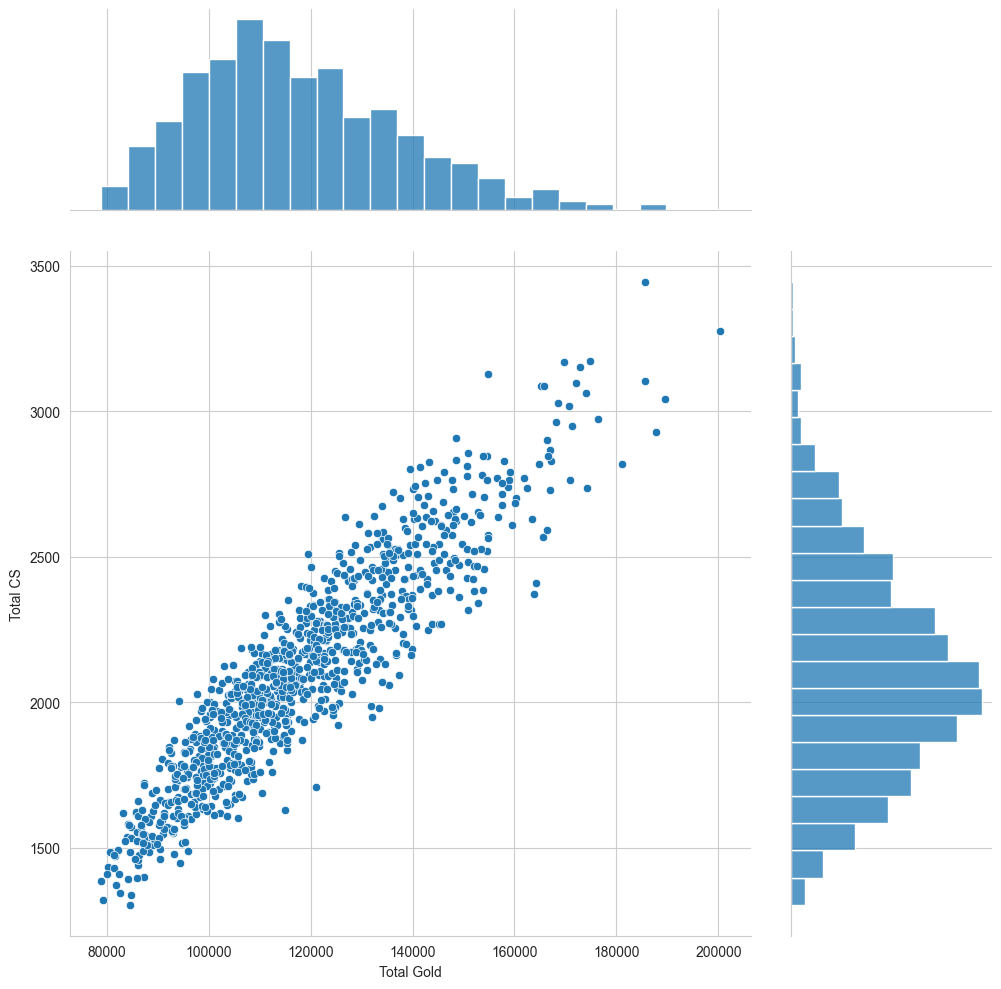

In [103]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([totalGoldEarned, totalCS], axis = 1).reindex(totalGoldEarned.index)

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the jointplot with adjusted height and aspect ratio
sns.jointplot(data=trainDF, x="Total Gold", y="Total CS", height=10, ratio=3)

# Show the plot
plt.show()

In [ ]:
totalcs_t2 = pd.DataFrame(loldataQtn2['t2_totalcs'])
print("Data type : ", type(totalcs_t2))
print("Data dims : ", totalcs_t2.size)
totalcs_t2.describe()


# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([totalGoldEarned_t2, totalcs_t2], axis = 1).reindex(totalGoldEarned_t2.index)

# Jointplot of Total Train against HP Train
sns.jointplot(data = trainDF, x = "t2_totalgold", y = "t2_totalcs", height = 12)